## <center>**TASK 1: Basic DataFrame Operations**</center>

In [11]:
from pandas import *
import pandas as p

#### *I.	Download a dataset of your choice (CSV, Excel, or any other format). And load the dataset into a Pandas DataFrame.*

In [12]:
data = read_excel('data.xlsx', sheet_name="Sheet1")

#### *II.	Display the first 5 rows of the dataset.*

In [13]:
data.head()

,Movies,Director,Actor,Actress,Rating,Censor,Year,Length
0,Kho Gaye Hum Kahan,Arjun Varain Singh,Sidhant Chaturvedi,Ananya Pandey,8.0,No,2023,135.0
1,Anyone But You,Will Gluck,Glen Powell,Sydney Sweeney,6.6,No,2024,113.0
2,Cruel Intentions,Roger Kumble,Ryan Phillippe,Reese Witherspoon,6.8,Yes,1999,97.0
3,It Ends With Us,Justin Baldoni,Justin Baldoni,Blake Lively,NaN,No,2024,NaN
4,The Voyeurs,Michael Mohan,Justice Smith,Sydney Sweeney,6.1,Yes,2021,116.0


#### *II.	Check for missing values and handle them appropriately.*

In [14]:
data.isnull().sum()

Movies      0
Director    0
Actor       0
Actress     0
Rating      1
Censor      0
Year        0
Length      1
dtype: int64

In [15]:
data['Length'].fillna(data['Length'].mean(), inplace=True)
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data

,Movies,Director,Actor,Actress,Rating,Censor,Year,Length
0,Kho Gaye Hum Kahan,Arjun Varain Singh,Sidhant Chaturvedi,Ananya Pandey,8.00,No,2023,135.0
1,Anyone But You,Will Gluck,Glen Powell,Sydney Sweeney,6.60,No,2024,113.0
2,Cruel Intentions,Roger Kumble,Ryan Phillippe,Reese Witherspoon,6.80,Yes,1999,97.0
3,It Ends With Us,Justin Baldoni,Justin Baldoni,Blake Lively,6.98,No,2024,114.8
4,The Voyeurs,Michael Mohan,Justice Smith,Sydney Sweeney,6.10,Yes,2021,116.0
5,Body Heat,Lawrence Kasdan,William Hurt,Kathleen Turner,7.40,Yes,1981,113.0


#### *II.	Get a summary of the dataset using describe().*

In [16]:
data.describe()

,Rating,Year,Length
count,6.000000,6.00,6.000000
mean,6.980000,2012.00,114.800000
std,0.658483,18.00,12.106197
min,6.100000,1981.00,97.000000
25%,6.650000,2004.50,113.000000
50%,6.890000,2022.00,113.900000
75%,7.295000,2023.75,115.700000
max,8.000000,2024.00,135.000000


#### *III.	Select a subset of columns from the DataFrame. Use both label-based and position-based indexing.*

In [17]:
sub_data_by_index = data[['Actor','Actress']]
sub_data_by_index

,Actor,Actress
0,Sidhant Chaturvedi,Ananya Pandey
1,Glen Powell,Sydney Sweeney
2,Ryan Phillippe,Reese Witherspoon
3,Justin Baldoni,Blake Lively
4,Justice Smith,Sydney Sweeney
5,William Hurt,Kathleen Turner


In [18]:
sub_data_by_pos = data.iloc[:,[0,1,2]]
sub_data_by_pos

,Movies,Director,Actor
0,Kho Gaye Hum Kahan,Arjun Varain Singh,Sidhant Chaturvedi
1,Anyone But You,Will Gluck,Glen Powell
2,Cruel Intentions,Roger Kumble,Ryan Phillippe
3,It Ends With Us,Justin Baldoni,Justin Baldoni
4,The Voyeurs,Michael Mohan,Justice Smith
5,Body Heat,Lawrence Kasdan,William Hurt


#### *III.	Create a new DataFrame by filtering rows based on a condition.*

In [19]:
new_data = data[data['Censor'] == "Yes"]
new_data

,Movies,Director,Actor,Actress,Rating,Censor,Year,Length
2,Cruel Intentions,Roger Kumble,Ryan Phillippe,Reese Witherspoon,6.8,Yes,1999,97.0
4,The Voyeurs,Michael Mohan,Justice Smith,Sydney Sweeney,6.1,Yes,2021,116.0
5,Body Heat,Lawrence Kasdan,William Hurt,Kathleen Turner,7.4,Yes,1981,113.0


## <center>**TASK 2: Data Cleaning and Preprocessing**</center>

#### *I.	Identify missing values in the dataset. Decide on a strategy to handle missing values (e.g., imputation or removal). Implement the chosen strategy and explain the reasoning.*

#### *II.	Create a new column by applying a mathematical operation on existing columns. Convert a categorical variable into numerical representation (e.g., using one-hot encoding).*

#### *III.	Group the data by a specific column. Apply aggregation functions (sum, mean, count) to the grouped data. Present the results in a meaningful way.*

In [20]:
data.groupby("Year")["Movies"].agg(list).reset_index().mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_3888\1789202964.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.groupby("Year")["Movies"].agg(list).reset_index().mean()


Year    2009.6
dtype: float64

In [21]:
data.groupby("Length")["Movies"].agg(list).reset_index().mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_3888\387590397.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.groupby("Length")["Movies"].agg(list).reset_index().mean()


Length    115.16
dtype: float64

In [22]:
data.groupby("Rating")["Movies"].agg(list).reset_index().mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_3888\2275640151.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.groupby("Rating")["Movies"].agg(list).reset_index().mean()


Rating    6.98
dtype: float64

## <center>**TASK 3: Load two different datasets. Merge them using different types of joins (inner, outer, left, right). Analyze the impact of each type of join on the merged dataset.**</center>

In [23]:
movies = read_excel("data.xlsx", sheet_name='Sheet1')
genre = read_excel("data.xlsx", sheet_name='Genres')

In [24]:
inner_join_result = merge(movies, genre, on='Movies', how='inner')
print("\nInner Join Result:")
print(inner_join_result)


Inner Join Result:
               Movies            Director               Actor  \
0  Kho Gaye Hum Kahan  Arjun Varain Singh  Sidhant Chaturvedi   
1      Anyone But You          Will Gluck         Glen Powell   
2    Cruel Intentions        Roger Kumble      Ryan Phillippe   
3     It Ends With Us      Justin Baldoni      Justin Baldoni   
4         The Voyeurs       Michael Mohan       Justice Smith   
5           Body Heat     Lawrence Kasdan        William Hurt   

             Actress  Rating Censor  Year  Length       Genre Sub-Genre  
0      Ananya Pandey     8.0     No  2023   135.0       Drama   Rom-Com  
1     Sydney Sweeney     6.6     No  2024   113.0      Comdey  Romantic  
2  Reese Witherspoon     6.8    Yes  1999    97.0  Teen Drama  Thriller  
3       Blake Lively     NaN     No  2024     NaN       Drama  Romantic  
4     Sydney Sweeney     6.1    Yes  2021   116.0      Erotic  Thriller  
5    Kathleen Turner     7.4    Yes  1981   113.0      Erotic  Thriller  


In [25]:
outer_join_result = merge(movies, genre, on='Movies', how='outer')
print("\nOuter Join Result:")
print(outer_join_result)


Outer Join Result:
               Movies            Director               Actor  \
0  Kho Gaye Hum Kahan  Arjun Varain Singh  Sidhant Chaturvedi   
1      Anyone But You          Will Gluck         Glen Powell   
2    Cruel Intentions        Roger Kumble      Ryan Phillippe   
3     It Ends With Us      Justin Baldoni      Justin Baldoni   
4         The Voyeurs       Michael Mohan       Justice Smith   
5           Body Heat     Lawrence Kasdan        William Hurt   

             Actress  Rating Censor  Year  Length       Genre Sub-Genre  
0      Ananya Pandey     8.0     No  2023   135.0       Drama   Rom-Com  
1     Sydney Sweeney     6.6     No  2024   113.0      Comdey  Romantic  
2  Reese Witherspoon     6.8    Yes  1999    97.0  Teen Drama  Thriller  
3       Blake Lively     NaN     No  2024     NaN       Drama  Romantic  
4     Sydney Sweeney     6.1    Yes  2021   116.0      Erotic  Thriller  
5    Kathleen Turner     7.4    Yes  1981   113.0      Erotic  Thriller  


In [26]:
left_join_result = merge(movies, genre, on='Movies', how='left')
print("\nLeft Join Result:")
print(left_join_result)


Left Join Result:
               Movies            Director               Actor  \
0  Kho Gaye Hum Kahan  Arjun Varain Singh  Sidhant Chaturvedi   
1      Anyone But You          Will Gluck         Glen Powell   
2    Cruel Intentions        Roger Kumble      Ryan Phillippe   
3     It Ends With Us      Justin Baldoni      Justin Baldoni   
4         The Voyeurs       Michael Mohan       Justice Smith   
5           Body Heat     Lawrence Kasdan        William Hurt   

             Actress  Rating Censor  Year  Length       Genre Sub-Genre  
0      Ananya Pandey     8.0     No  2023   135.0       Drama   Rom-Com  
1     Sydney Sweeney     6.6     No  2024   113.0      Comdey  Romantic  
2  Reese Witherspoon     6.8    Yes  1999    97.0  Teen Drama  Thriller  
3       Blake Lively     NaN     No  2024     NaN       Drama  Romantic  
4     Sydney Sweeney     6.1    Yes  2021   116.0      Erotic  Thriller  
5    Kathleen Turner     7.4    Yes  1981   113.0      Erotic  Thriller  


In [27]:
right_join_result = merge(movies, genre, on='Movies', how='right')
print("\nRight Join Result:")
print(right_join_result)


Right Join Result:
               Movies            Director               Actor  \
0  Kho Gaye Hum Kahan  Arjun Varain Singh  Sidhant Chaturvedi   
1      Anyone But You          Will Gluck         Glen Powell   
2    Cruel Intentions        Roger Kumble      Ryan Phillippe   
3     It Ends With Us      Justin Baldoni      Justin Baldoni   
4         The Voyeurs       Michael Mohan       Justice Smith   
5           Body Heat     Lawrence Kasdan        William Hurt   

             Actress  Rating Censor  Year  Length       Genre Sub-Genre  
0      Ananya Pandey     8.0     No  2023   135.0       Drama   Rom-Com  
1     Sydney Sweeney     6.6     No  2024   113.0      Comdey  Romantic  
2  Reese Witherspoon     6.8    Yes  1999    97.0  Teen Drama  Thriller  
3       Blake Lively     NaN     No  2024     NaN       Drama  Romantic  
4     Sydney Sweeney     6.1    Yes  2021   116.0      Erotic  Thriller  
5    Kathleen Turner     7.4    Yes  1981   113.0      Erotic  Thriller  


## <center>**TASK 4: Visualization**</center>

#### *I.	Create a bar plot, line plot, and scatter plot using Pandas plotting functions. Customize the plots to make them more informative.*

<Axes: title={'center': 'Rating'}, xlabel='Movies', ylabel='Ratings'>

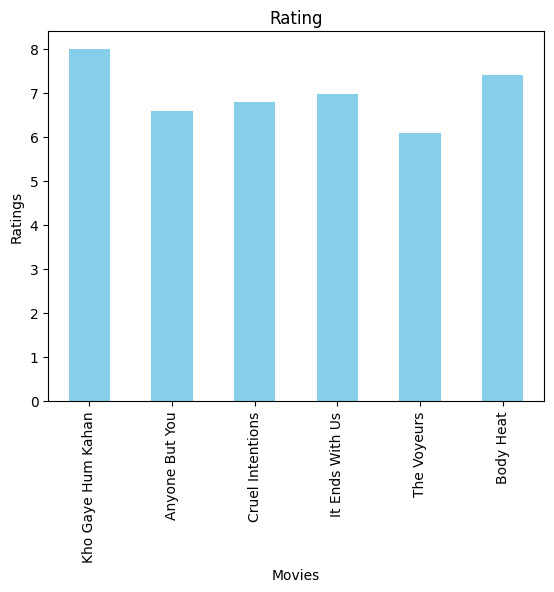

In [28]:
data.plot(kind='bar', x='Movies', y='Rating', color='skyblue', legend=False, title='Rating', ylabel="Ratings", xlabel="Movies")

<Axes: title={'center': 'Rating'}, xlabel='Movies', ylabel='Ratings'>

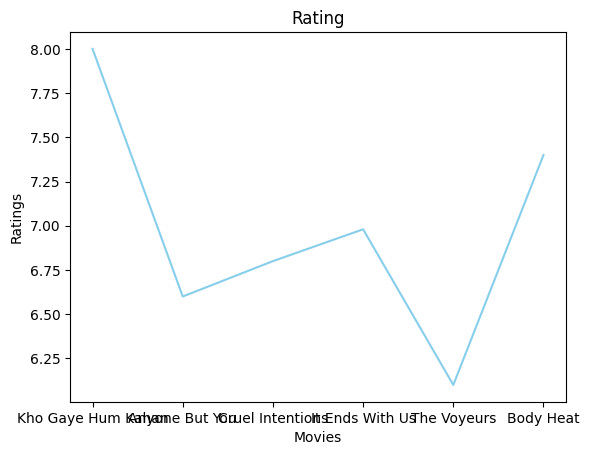

In [29]:
data.plot(kind='line', x='Movies', y='Rating', color='skyblue', legend=False, title='Rating', ylabel="Ratings", xlabel="Movies")

<Axes: title={'center': 'Rating'}, xlabel='Movies', ylabel='Ratings'>

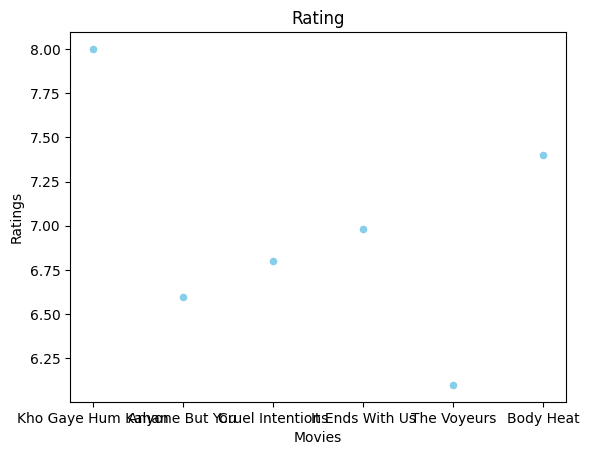

In [30]:
data.plot(kind='scatter', x='Movies', y='Rating', color='skyblue', legend=False, title='Rating', ylabel="Ratings", xlabel="Movies")

#### *II.	Visualize the correlation matrix of numerical columns. Highlight highly correlated features.*

#### *III.	Create histograms and box plots for numerical columns. Analyze the distribution and presence of outliers*

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

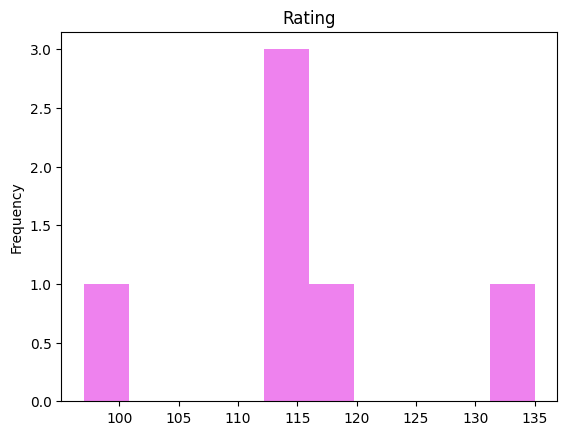

In [31]:
data.plot(kind='hist', x='Movies', y='Length', color='violet', legend=False, title='Rating')

## <center>**TASK 5: Basic NumPy Operations**</center>

In [32]:
from numpy import * 

#### *1.	Create a NumPy array 'arr' with values from 1 to 10.*

In [33]:
arr = arange(1,11, dtype="int32")
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#### *2.	Create another NumPy array 'arr2' with values from 11 to 20.*

In [34]:
arr2 = arange(11,21, dtype="int32")
arr2

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

#### *3.	Add, subtract, multiply, and divide 'arr' and 'arr2'. Print the results.*

In [35]:
print(f"The sum of the arrays is: {arr+arr2}")
print(f"The difference of the arrays is: {arr-arr2}")
print(f"The multiplication of the arrays is: {arr*arr2}")
print(f"The division of the arrays is: {arr/arr2}")

The sum of the arrays is: [12 14 16 18 20 22 24 26 28 30]
The difference of the arrays is: [-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
The multiplication of the arrays is: [ 11  24  39  56  75  96 119 144 171 200]
The division of the arrays is: [0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5       ]


## <center>**TASK 6: Array Manipulation**</center>

#### *1.	Reshape 'arr' into a 2x5 matrix.*

In [36]:
new_arr = arr.reshape(2,5)
new_arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

#### *2.	Transpose the matrix obtained in the previous step.*

In [37]:
new_arr.transpose()

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

#### *3.	Flatten the transposed matrix into a 1D array.*

In [38]:
new_arr.reshape(1,10)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

#### *4.	Stack 'arr' and 'arr2' vertically. Print the result.*

In [39]:
vstack((arr, arr2))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

## <center>**TASK 7: Statistical Operations**</center>

#### *1.	Calculate the mean, median, and standard deviation of 'arr'.*

In [40]:
std = std(arr)
med = median(arr)
mean = mean(arr)
print(f"The median is: {med}")
print(f"The mean is: {mean}")
print(f"The standard deviation is: {std}")


The median is: 5.5
The mean is: 5.5
The standard deviation is: 2.8722813232690143


#### *2.	Find the maximum and minimum values in 'arr'.*

In [41]:
print(f"The max is is: {max(arr)}")
print(f"The min is: {min(arr)}")


The max is is: 10
The min is: 1


#### *3.	Normalize 'arr' (subtract the mean and divide by the standard deviation).*

In [42]:
normal_array = []
for data in arr:
    normal_array.append((data-mean)/std)
print(f"Normalized Array: {normal_array}")

Normalized Array: [-1.5666989036012806, -1.2185435916898848, -0.8703882797784892, -0.5222329678670935, -0.17407765595569785, 0.17407765595569785, 0.5222329678670935, 0.8703882797784892, 1.2185435916898848, 1.5666989036012806]


## <center>**TASK 8: Boolean Indexing**</center>

#### *1.	Create a boolean array 'bool_arr' for elements in 'arr' greater than 5.*

In [43]:
bool_arr = list(map((lambda x: x>5), arr))
bool_arr

[False, False, False, False, False, True, True, True, True, True]

#### *2.	Use 'bool_arr' to extract the elements from 'arr' that are greater than 5.*

In [44]:
bool_arr2 = arr[bool_arr]
bool_arr2

array([ 6,  7,  8,  9, 10])

## <center>**TASK 9: Random Module**</center>

#### *1.	Generate a 3x3 matrix with random values between 0 and 1.*

In [45]:
rand_arr = random.randint(0,1, (3,3))
rand_arr

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

#### *2.	Create an array of 10 random integers between 1 and 100.*

In [46]:
rand_arr = random.randint(1,100, (1,10))
rand_arr

array([[14, 73, 50, 53, 49, 58, 63, 19, 32, 12]])

#### *3.	Shuffle the elements of 'arr' randomly.*

In [47]:
random.shuffle(arr)
arr

array([ 5,  6,  1,  2,  3,  8,  4,  9,  7, 10])

## <center>**TASK 10: Random Module**</center>

#### *1.	Apply the square root function to all elements in 'arr'.*

In [48]:
list(map(lambda x: sqrt(x),arr))

[2.23606797749979,
 2.449489742783178,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.8284271247461903,
 2.0,
 3.0,
 2.6457513110645907,
 3.1622776601683795]

### <center>**OR**</center>

In [49]:
square_root = sqrt(arr)
square_root

array([2.23606798, 2.44948974, 1.        , 1.41421356, 1.73205081,
       2.82842712, 2.        , 3.        , 2.64575131, 3.16227766])

#### *2.	Use the exponential function to calculate exex for each element in 'arr'.*

In [50]:
import numpy
exponential_array = numpy.exp(arr)
print(exponential_array)

[1.48413159e+02 4.03428793e+02 2.71828183e+00 7.38905610e+00
 2.00855369e+01 2.98095799e+03 5.45981500e+01 8.10308393e+03
 1.09663316e+03 2.20264658e+04]


## <center>**TASK 11: Linear Algebra Operations**</center>

#### *1.	Create a 3x3 matrix 'mat_a' with random values.*

In [51]:
mat_a = matrix(random.randint(0,100, (3,3)))
mat_a

matrix([[84,  9, 51],
        [86, 54,  0],
        [54, 29, 18]])

#### *2.	Create a 3x1 matrix 'vec_b' with random values.*

In [52]:
vec_b = matrix(random.randint(0,100, (3,1)))
vec_b

matrix([[ 1],
        [75],
        [51]])

#### *3.	Multiply 'mat_a' and 'vec_b' using the dot product.*

In [53]:
mat_a.dot(vec_b)

matrix([[3360],
        [4136],
        [3147]])

## <center>**TASK 12: Broadcasting**</center>

#### *1.	Create a 2D array 'matrix' with values from 1 to 9.*

In [54]:
matrix = arange(1,9)
matrix

array([1, 2, 3, 4, 5, 6, 7, 8])

#### *2.	Subtract the mean of each row from each element in that row.*

In [55]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]

In [56]:
import numpy

mean_row = []
for x in range(len(matrix)):
    for y in range(len(matrix)):
        mean_row.append(matrix[x][y]-numpy.mean(matrix[x]))
mean_row

[-1.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0]

In [57]:
import numpy

mean_row = []
for x in range(len(matrix)):
    for y in range(len(matrix)):
        matrix[x][y]=matrix[x][y]-numpy.mean(matrix[x])
matrix

[[-1.0, 0.6666666666666667, 2.111111111111111],
 [-1.0, 1.6666666666666665, 3.777777777777778],
 [-1.0, 2.666666666666667, 5.444444444444445]]